# Hand Motion
### notebook 4

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
#from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from mpl_toolkits.mplot3d import Axes3D
 
import warnings
warnings.filterwarnings('ignore')

function that help me to prepare the data

In [37]:
def split_row_every_5(df):
    df = df[df.index % 5 == 0].reset_index(drop=True)
        
    return df    

In [90]:
def join_row_every_4(df):
    for i in range (2):
        temp1 = df[df['ind']%2 == 0]
        temp2 = df[df['ind']%2 != 0]
        df = pd.merge(temp1, temp2, how= 'outer', on= ['ind'])
    return df.iloc[:round(df.shape[0]/4)]    

I choose Evyatar to be my test

In [2]:
#evyatar
ev_alone = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Evyatar Cohen\Evyatar636771054555711409Alone.csv')
ev_spon = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Evyatar Cohen\Evyatar636771052727603804Spontan.csv')
ev_syn = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Evyatar Cohen\Evyatar636771053639929594Sync.csv')

In [159]:
ev_alone.shape

(4526, 23)

#### prepare the Data Frame test

In [133]:
right_t = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\HandRight.csv')
right_t = right_t[right_t[' Hand Type'] == 'right']
right_t = right_t.dropna()
right_t = pd.concat([right_t]*2, ignore_index=True)
right_t

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.671670,226.2064,20.26470,34.26665,-195.214700,-35.043020,...,-0.277800,46.888310,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.241190,222.9389,20.11781,36.16443,-180.093900,-4.052799,...,-0.277763,47.548610,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.724610,220.9709,19.94972,26.35298,-95.088190,-11.157620,...,-0.278792,48.150300,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.090160,219.7124,19.67679,19.46804,-61.755180,-21.303780,...,-0.279768,48.641750,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.460170,219.3652,19.13128,21.94964,-8.355943,-35.081790,...,-0.278629,48.931350,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,201.0806,23867,right,1,-8.623579,163.7605,207.30110,-271.90140,-12.955970,1133.339000,...,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0
8704,201.0967,23869,right,1,-13.097740,162.5545,225.69850,-266.21290,-102.128600,1029.193000,...,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0
8705,201.1133,23871,right,1,-16.722380,160.9650,240.58440,-192.59430,-87.538560,769.651500,...,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0
8706,201.1299,23873,right,1,-19.684070,160.7849,251.09980,-158.99720,73.457400,557.203700,...,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0


In [136]:
right_t.insert(2, "ind", range(8708), True)
ev_alone.insert(2, "ind", range(4526), True)
alone_test = pd.merge(ev_alone, right_t, how= 'outer', on= ['ind'])
alone_test.iloc[:4526]

,Time_x,Frame ID_x,ind,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,518.8087,149620.0,0,left,1.0,-97.60160,164.1213,42.812550,104.2589,-491.6730,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,518.8252,149622.0,1,left,1.0,-95.78062,157.6353,42.180840,148.9683,-351.7386,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,518.8418,149623.0,2,left,1.0,-94.39360,154.6338,41.931710,161.6958,-349.9117,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,518.8587,149625.0,3,left,1.0,-92.02553,150.6723,42.101190,117.3475,-187.1781,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,518.8749,149627.0,4,left,1.0,-89.31953,148.1826,42.670650,155.3344,-135.6337,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4521,593.7177,158254.0,4521,left,1.0,-44.79453,123.7657,-6.241947,274.4463,106.7892,...,-0.187651,48.94651,220.0625,55.61234,192.0203,71.52789,229.9881,0.0,0.591927,0.0
4522,593.7343,158256.0,4522,left,1.0,-40.77390,126.7342,-3.452266,223.5294,209.7239,...,-0.182237,52.95274,219.1581,57.61229,191.9263,67.17075,232.3207,0.0,0.617524,0.0
4523,593.7509,158257.0,4523,left,1.0,-38.56184,127.6858,-2.086977,254.9331,109.6613,...,-0.178711,58.01189,219.4391,59.85920,193.7632,64.99233,234.9431,0.0,0.646399,0.0
4524,593.7681,158259.0,4524,left,1.0,-35.88303,132.9386,0.526575,185.8687,204.9822,...,-0.173076,64.01846,219.6408,62.38213,197.3784,63.99200,238.2346,0.0,0.650936,0.0


In [147]:
spon_ev = pd.merge(ev_spon[ev_spon[' Hand Type'] == 'left'], ev_spon[ev_spon[' Hand Type'] == 'right'], how= 'outer', on= [' Frame ID','Time'])


In [148]:
sync_ev = pd.merge(ev_syn[ev_syn[' Hand Type'] == 'left'], ev_syn[ev_syn[' Hand Type'] == 'right'], how= 'outer', on= [' Frame ID','Time'])


In [149]:
alone_t = split_row_every_5(alone_test)
spon_t = split_row_every_5(spon_ev)
sync_t = split_row_every_5(sync_ev)
print(alone_t.shape)
print(spon_t.shape)
print(sync_t.shape)

(1742, 45)
(906, 42)
(906, 42)


In [150]:
spon_t.insert(2, "ind", range(906),True)
sync_t.insert(2, "ind", range(906),True)

In [151]:
alone_t_ = join_row_every_4(alone_t)
spon_t_ = join_row_every_4(spon_t)
sync_t_ = join_row_every_4(sync_t)
print(alone_t_.shape)
print(spon_t_.shape)
print(sync_t_.shape)

(436, 177)
(226, 169)
(226, 169)


In [152]:
alone_t_['label'] = 1
spon_t_['label'] = 2
sync_t_['label'] = 3

In [162]:
test = [alone_t_, spon_t_,sync_t_]
test_df = pd.concat(test)
test_df = test_df.dropna(axis='columns')
test_df

,ind,Hand Type_x_x_x,# hands_x_x_x,Position X_x_x_x,Position Y_x_x_x,Position Z_x_x_x,Velocity X_x_x_x,Velocity Y_x_x_x,Velocity Z_x_x_x,Pitch_x_x_x,...,Wrist Pos X_y_x_x,Wrist Pos Y_y_x_x,Wrist Pos Z_y_x_x,Elbow pos X_y_x_x,Elbow Pos Y_y_x_x,Elbow Pos Z_y_x_x,Grab Strenth_y_x_x,Grab Angle_y_x_x,Pinch Strength_y_x_x,label
0,0,left,1.0,-97.60160,164.1213,42.812550,104.25890,-491.67300,-55.427550,2.939312,...,46.88831,207.3548,86.23589,203.8337,49.335070,237.45530,0.000000,0.206389,0.000000,1
1,10,left,1.0,-67.05989,132.6374,43.075160,242.26170,-100.21330,20.354860,0.971804,...,50.22053,202.4105,82.17856,198.7624,32.086820,228.42370,0.000000,0.466381,0.000000,1
2,20,left,1.0,-23.62660,145.6105,45.241630,361.30030,233.29100,-130.042800,1.012865,...,50.77441,206.9303,84.81361,206.5852,50.059390,238.36160,0.000000,0.669196,0.119215,1
3,30,left,1.0,-13.28533,167.2970,24.489080,-51.34582,215.67230,-169.914900,0.908828,...,49.87231,201.9112,88.98869,211.1888,38.752330,229.75720,0.000000,0.134935,0.000000,1
4,40,left,1.0,-32.57807,187.8897,-4.852212,-121.87600,215.13070,-171.885600,0.785230,...,47.18960,219.2856,86.15994,216.0508,71.159290,234.64150,0.000000,0.113478,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,442,left,2.0,-98.89789,220.0154,60.266540,-239.03000,206.45030,4.946930,1.648540,...,204.03050,194.3474,63.51344,361.3742,4.748242,107.42650,0.740000,1.507735,0.899133,3
222,444,left,2.0,-142.85460,243.2408,62.604540,-251.36320,230.20440,59.454980,1.613714,...,226.88760,212.7965,75.58141,369.5499,9.208945,104.43980,0.478805,1.332055,0.000000,3
223,446,left,2.0,-175.93490,247.0654,55.881730,-191.78790,63.88491,-3.553489,1.603899,...,242.18310,221.1091,78.81551,385.4815,16.219890,88.99587,0.308339,1.236514,0.000000,3
224,448,left,2.0,-170.72780,228.1751,54.439220,241.32560,-215.61790,1.676239,1.541237,...,217.22170,206.2201,64.93182,355.8032,-0.812632,87.33508,0.034777,1.168916,0.000000,3


In [163]:
test_df = test_df.drop(columns= ['ind',
                        ' Hand Type_x_x_x',
                        ' # hands_x_x_x',
                        ' Hand Type_y_x_x',
                        ' # hands_y_x_x'] )

In [164]:
test_df = test_df.sample(frac=1).reset_index(drop=True)
test_df

,Position X_x_x_x,Position Y_x_x_x,Position Z_x_x_x,Velocity X_x_x_x,Velocity Y_x_x_x,Velocity Z_x_x_x,Pitch_x_x_x,Roll_x_x_x,Yaw_x_x_x,Wrist Pos X_x_x_x,...,Wrist Pos X_y_x_x,Wrist Pos Y_y_x_x,Wrist Pos Z_y_x_x,Elbow pos X_y_x_x,Elbow Pos Y_y_x_x,Elbow Pos Z_y_x_x,Grab Strenth_y_x_x,Grab Angle_y_x_x,Pinch Strength_y_x_x,label
0,-84.77445,219.9709,30.484270,-35.54314,49.276630,34.302840,1.645852,1.034245,1.689043,-127.8181,...,222.829100,162.6096,0.808015,315.48970,-27.941510,132.57380,0.369038,1.477622,0.0,2
1,-72.06770,218.4834,66.127170,-40.49865,195.892200,2.981333,1.491809,1.010245,1.450276,-114.4440,...,109.258800,127.5207,64.103090,281.55950,-52.262820,89.16325,0.000000,0.025171,0.0,3
2,-111.66070,159.7110,11.289770,216.27520,-38.528610,-136.847800,0.821623,0.768106,1.079597,-171.0462,...,33.247990,202.4621,91.906910,149.50630,5.209536,238.72680,0.068008,0.755712,0.0,1
3,-55.24342,266.4410,49.016780,-229.38140,40.850800,34.867480,1.739187,0.653241,1.700710,-112.4531,...,42.288500,107.1996,99.649450,115.53110,-3.793579,337.64100,0.000000,0.706665,0.0,1
4,-96.86812,229.9868,37.814320,-188.38530,8.810323,55.414730,0.593139,-0.407190,1.367391,-165.1110,...,65.820930,296.4175,54.521250,261.46120,175.082000,195.08760,0.000000,0.074572,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,-74.33638,180.4338,6.541019,-11.45090,225.122400,-9.673128,-0.346245,0.609003,1.332300,-144.8248,...,12.882880,133.8248,122.060500,97.00406,89.131050,380.16690,0.000000,0.753635,0.0,1
884,-90.12891,141.7974,29.700420,62.80939,-329.279000,-29.013230,0.971138,0.461232,1.221073,-154.0480,...,176.284900,123.7464,-13.206450,272.85240,16.208340,194.61800,0.000000,0.000000,0.0,2
885,-119.73140,126.7305,54.427080,150.78430,0.247298,55.122120,1.514078,0.790519,1.513333,-172.8513,...,185.735600,116.9887,97.746310,351.42490,3.095591,246.82150,0.000000,0.117585,0.0,3
886,-96.93656,210.1219,26.706210,122.18400,63.300630,18.624280,-2.527907,-0.051517,1.684844,-162.4271,...,199.305100,158.0999,42.275340,414.99410,72.278830,126.83730,0.000000,0.201418,0.0,2


test_df is the data for the test

#### prepare the Data Frame train

In [4]:
#nofar
nof_alone = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Nofar Social_Nuero\Nofar636759796290435160Alone.csv')
nof_spon = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Nofar Social_Nuero\Nofar636759795182793299Spontan.csv')
nof_syn = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Nofar Social_Nuero\Nofar636759797397919664Sync.csv')

In [5]:
#oriya
oriya_alone = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Oriya Social_Nuero\Oriya636759805268396661Alone.csv')
oriya_spon = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Oriya Social_Nuero\Oriya636759804404113837Spontan.csv')
oriya_syn = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Oriya Social_Nuero\Oriya636759806131350399Sync.csv')

In [6]:
#orya
orya_alone = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Orya Kalmanovitz\OryaB636771082736601528Alone.csv')
orya_spon = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Orya Kalmanovitz\OryaB636771083605535985Spontan.csv')
orya_syn = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Orya Kalmanovitz\OryaB636771084494502229Sync.csv')

In [7]:
#revital
rev_alone = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Revital Marbel\Revital636770955999435879Alone.csv')
rev_spon = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Revital Marbel\Revital636770957038873193Spontan.csv')
rev_syn = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Revital Marbel\Revital636770957894370062Sync.csv')

In [8]:
#shahar
sha_alone = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Shahar Terner\Sachar636771047408504303Alone.csv')
sha_spon = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Shahar Terner\Sachar636771045591258071Spontan.csv')
sha_syn = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Shahar Terner\Sachar636771046527112972Sync.csv')

In [9]:
#shelly
shel_alone = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Shelly Social_Nuero\Shelly636759788383205274Alone.csv')
shel_spon = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Shelly Social_Nuero\Shelly636759787508979097Spontan.csv')
shel_syn = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Shelly Social_Nuero\Shelly636759789526313406Sync.csv')

In [10]:
#yael
yael_alone = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Yael Hagai\Yael636771061659067649Alone.csv')
yael_spon = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Yael Hagai\Yael636771059544754823Spontan.csv')
yael_syn = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Yael Hagai\Yael636771060699529085Sync.csv')

In [11]:
#yoel
yoel_alone = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Yoel Raz\Yoel636760922573364655Alone.csv')
yoel_spon = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Yoel Raz\Yoel636760921663075813Spontan.csv')
yoel_syn = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Training\Yoel Raz\Yoel636760923490742912Sync.csv')

now I'll join all the files to one train dataset

In [12]:
alone = [nof_alone,oriya_alone,orya_alone,rev_alone,sha_alone,shel_alone,yael_alone,yoel_alone]
df_alone = pd.concat(alone)
df_alone = df_alone[df_alone[' # hands'] == 1]
df_alone

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,496.0675,58186,left,1,-54.31166,157.7245,15.86070,74.312630,-212.559300,-3.443930,...,1.807927,-117.0938,182.8604,-6.841371,-348.7168,72.03372,-45.75863,0.000000,0.909143,0.000000
1,496.0836,58188,left,1,-55.30029,157.4318,16.38448,-13.396160,-80.758470,36.267060,...,1.833118,-116.9684,184.4513,-7.018164,-354.0902,82.99192,-37.44109,0.000000,0.821731,0.000000
2,496.1004,58190,left,1,-54.63298,156.0129,16.98297,47.584080,-78.984400,34.058400,...,1.831093,-116.6140,182.7160,-6.182822,-356.1150,86.05158,-33.41483,0.000000,0.855693,0.000000
3,496.1167,58192,left,1,-53.41868,153.9157,17.23620,73.649140,-126.908300,8.471523,...,1.825657,-115.9555,179.8159,-5.677634,-357.0149,86.90889,-32.22887,0.000000,0.840484,0.000000
4,496.1333,58194,left,1,-52.18176,151.8651,17.44527,69.912770,-95.288320,9.696599,...,1.820341,-115.3636,176.6590,-5.346976,-357.7861,87.48306,-32.27857,0.000000,0.853465,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,764.4578,59984,left,1,-125.81370,214.8894,20.59324,20.170870,19.997410,37.082170,...,0.409534,-146.6314,148.2971,44.407660,-258.0887,-77.52971,112.97060,0.116068,1.901876,0.000000
2246,764.4913,59986,left,1,-125.92320,215.6769,22.09264,-6.867068,21.957800,42.485630,...,0.399021,-146.1113,148.8045,45.689300,-253.6847,-80.13625,109.99670,0.134497,1.952747,0.000000
2247,764.5253,59988,left,1,-125.62170,215.7428,23.39750,17.454730,-3.217659,31.446690,...,0.379251,-144.8174,148.4588,46.660750,-249.6531,-83.33176,105.00430,0.120680,1.984825,0.000000
2248,764.5587,59989,left,1,-125.13520,215.6353,23.80248,25.567410,-5.648659,21.284490,...,0.368866,-143.8482,148.1024,46.728610,-248.2768,-84.26936,103.46830,0.097735,1.988376,0.000000


In [25]:
#hand_right
right = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\HandRight.csv')
right = right[right[' Hand Type'] == 'right']
right = right.dropna()
right

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.671670,226.2064,20.26470,34.26665,-195.214700,-35.043020,...,-0.277800,46.888310,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.241190,222.9389,20.11781,36.16443,-180.093900,-4.052799,...,-0.277763,47.548610,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.724610,220.9709,19.94972,26.35298,-95.088190,-11.157620,...,-0.278792,48.150300,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.090160,219.7124,19.67679,19.46804,-61.755180,-21.303780,...,-0.279768,48.641750,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.460170,219.3652,19.13128,21.94964,-8.355943,-35.081790,...,-0.278629,48.931350,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,201.0806,23867,right,1,-8.623579,163.7605,207.30110,-271.90140,-12.955970,1133.339000,...,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0
4390,201.0967,23869,right,1,-13.097740,162.5545,225.69850,-266.21290,-102.128600,1029.193000,...,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0
4391,201.1133,23871,right,1,-16.722380,160.9650,240.58440,-192.59430,-87.538560,769.651500,...,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0
4392,201.1299,23873,right,1,-19.684070,160.7849,251.09980,-158.99720,73.457400,557.203700,...,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0


In [26]:
right = pd.concat([right]*8, ignore_index=True)
right

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.671670,226.2064,20.26470,34.26665,-195.214700,-35.043020,...,-0.277800,46.888310,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.241190,222.9389,20.11781,36.16443,-180.093900,-4.052799,...,-0.277763,47.548610,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.724610,220.9709,19.94972,26.35298,-95.088190,-11.157620,...,-0.278792,48.150300,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.090160,219.7124,19.67679,19.46804,-61.755180,-21.303780,...,-0.279768,48.641750,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.460170,219.3652,19.13128,21.94964,-8.355943,-35.081790,...,-0.278629,48.931350,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34827,201.0806,23867,right,1,-8.623579,163.7605,207.30110,-271.90140,-12.955970,1133.339000,...,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0
34828,201.0967,23869,right,1,-13.097740,162.5545,225.69850,-266.21290,-102.128600,1029.193000,...,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0
34829,201.1133,23871,right,1,-16.722380,160.9650,240.58440,-192.59430,-87.538560,769.651500,...,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0
34830,201.1299,23873,right,1,-19.684070,160.7849,251.09980,-158.99720,73.457400,557.203700,...,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0


In [27]:
right.insert(2, "ind", range(34832), True)
right

,Time,Frame ID,ind,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,0,right,1,15.671670,226.2064,20.26470,34.26665,-195.214700,...,-0.277800,46.888310,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,1,right,1,16.241190,222.9389,20.11781,36.16443,-180.093900,...,-0.277763,47.548610,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,2,right,1,16.724610,220.9709,19.94972,26.35298,-95.088190,...,-0.278792,48.150300,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,3,right,1,17.090160,219.7124,19.67679,19.46804,-61.755180,...,-0.279768,48.641750,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,4,right,1,17.460170,219.3652,19.13128,21.94964,-8.355943,...,-0.278629,48.931350,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34827,201.0806,23867,34827,right,1,-8.623579,163.7605,207.30110,-271.90140,-12.955970,...,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0
34828,201.0967,23869,34828,right,1,-13.097740,162.5545,225.69850,-266.21290,-102.128600,...,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0
34829,201.1133,23871,34829,right,1,-16.722380,160.9650,240.58440,-192.59430,-87.538560,...,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0
34830,201.1299,23873,34830,right,1,-19.684070,160.7849,251.09980,-158.99720,73.457400,...,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0


In [28]:
df_alone.insert(2, "ind", range(33288),True)
df_alone

,Time,Frame ID,ind,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,496.0675,58186,0,left,1,-54.31166,157.7245,15.86070,74.312630,-212.559300,...,1.807927,-117.0938,182.8604,-6.841371,-348.7168,72.03372,-45.75863,0.000000,0.909143,0.000000
1,496.0836,58188,1,left,1,-55.30029,157.4318,16.38448,-13.396160,-80.758470,...,1.833118,-116.9684,184.4513,-7.018164,-354.0902,82.99192,-37.44109,0.000000,0.821731,0.000000
2,496.1004,58190,2,left,1,-54.63298,156.0129,16.98297,47.584080,-78.984400,...,1.831093,-116.6140,182.7160,-6.182822,-356.1150,86.05158,-33.41483,0.000000,0.855693,0.000000
3,496.1167,58192,3,left,1,-53.41868,153.9157,17.23620,73.649140,-126.908300,...,1.825657,-115.9555,179.8159,-5.677634,-357.0149,86.90889,-32.22887,0.000000,0.840484,0.000000
4,496.1333,58194,4,left,1,-52.18176,151.8651,17.44527,69.912770,-95.288320,...,1.820341,-115.3636,176.6590,-5.346976,-357.7861,87.48306,-32.27857,0.000000,0.853465,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,764.4578,59984,33283,left,1,-125.81370,214.8894,20.59324,20.170870,19.997410,...,0.409534,-146.6314,148.2971,44.407660,-258.0887,-77.52971,112.97060,0.116068,1.901876,0.000000
2246,764.4913,59986,33284,left,1,-125.92320,215.6769,22.09264,-6.867068,21.957800,...,0.399021,-146.1113,148.8045,45.689300,-253.6847,-80.13625,109.99670,0.134497,1.952747,0.000000
2247,764.5253,59988,33285,left,1,-125.62170,215.7428,23.39750,17.454730,-3.217659,...,0.379251,-144.8174,148.4588,46.660750,-249.6531,-83.33176,105.00430,0.120680,1.984825,0.000000
2248,764.5587,59989,33286,left,1,-125.13520,215.6353,23.80248,25.567410,-5.648659,...,0.368866,-143.8482,148.1024,46.728610,-248.2768,-84.26936,103.46830,0.097735,1.988376,0.000000


In [87]:
try1 = pd.merge(df_alone, right, how= 'outer',on= ['ind'])


In [33]:
df_alone_rl = try1.iloc[:33288]
df_alone_rl

,Time_x,Frame ID_x,ind,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,496.0675,58186.0,0,left,1.0,-54.31166,157.7245,15.86070,74.312630,-212.559300,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.335070,237.4553,0.0,0.206389,0.0
1,496.0836,58188.0,1,left,1.0,-55.30029,157.4318,16.38448,-13.396160,-80.758470,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.882720,238.4482,0.0,0.243050,0.0
2,496.1004,58190.0,2,left,1.0,-54.63298,156.0129,16.98297,47.584080,-78.984400,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.359210,236.8544,0.0,0.281134,0.0
3,496.1167,58192.0,3,left,1.0,-53.41868,153.9157,17.23620,73.649140,-126.908300,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.186920,236.0927,0.0,0.277691,0.0
4,496.1333,58194.0,4,left,1.0,-52.18176,151.8651,17.44527,69.912770,-95.288320,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.680030,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33283,764.4578,59984.0,33283,left,1.0,-125.81370,214.8894,20.59324,20.170870,19.997410,...,0.338243,44.79097,119.9499,94.67036,108.4651,15.760030,338.3242,0.0,0.510383,0.0
33284,764.4913,59986.0,33284,left,1.0,-125.92320,215.6769,22.09264,-6.867068,21.957800,...,0.351156,44.70627,119.4337,93.59807,117.3109,27.865220,339.8112,0.0,0.574207,0.0
33285,764.5253,59988.0,33285,left,1.0,-125.62170,215.7428,23.39750,17.454730,-3.217659,...,0.315014,45.87228,124.8337,91.32598,121.8591,33.131470,336.4664,0.0,0.577384,0.0
33286,764.5587,59989.0,33286,left,1.0,-125.13520,215.6353,23.80248,25.567410,-5.648659,...,0.275010,46.17039,128.2447,90.84488,118.7950,20.434540,330.3856,0.0,0.480993,0.0


In [67]:
spon = [nof_spon,oriya_spon,orya_spon,rev_spon,sha_spon,shel_spon,yael_spon,yoel_spon]
df_spon = pd.concat(spon)
df_spon = df_spon[df_spon[' # hands'] == 2]
df_spon

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,385.3023,45421,right,2,84.46407,205.2425,129.25620,10.362360,14.27013,-175.900300,...,-0.811867,139.4453,176.9281,165.18970,371.1763,118.90700,249.19900,0.0,0.105978,0.0
1,385.3023,45421,left,2,-101.47470,201.6224,45.53434,110.036900,-158.14970,-336.006600,...,1.869434,-165.9261,201.3730,17.71334,-354.8739,48.94086,-54.30361,0.0,0.408430,0.0
2,385.3189,45423,right,2,84.53292,205.0706,125.73420,11.283680,13.80425,-199.939800,...,-0.798033,139.1613,176.8005,162.22480,372.0204,121.27320,244.85750,0.0,0.081881,0.0
3,385.3189,45423,left,2,-100.64600,200.7659,40.11415,59.850410,-96.17702,-315.820300,...,1.850330,-165.4394,202.0032,13.41595,-351.5085,46.76607,-60.16769,0.0,0.440008,0.0
4,385.3359,45425,right,2,84.75890,205.5481,122.01730,9.366974,22.98078,-220.643100,...,-0.782294,138.8203,176.8812,159.02130,372.5789,123.41730,240.55030,0.0,0.068991,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,673.4894,52512,left,2,-81.66566,203.9826,24.04028,240.809500,-160.56200,-222.444200,...,0.845894,-121.2401,146.1889,44.91408,-263.3239,-65.38571,89.68940,0.0,1.299514,0.0
4371,673.5233,52516,right,2,158.51870,172.6876,-29.32913,62.951450,93.99306,-63.022420,...,-0.452287,200.4651,148.9561,25.42753,400.5782,31.01108,139.27960,0.0,0.448368,0.0
4372,673.5233,52516,left,2,-77.57621,198.9182,20.57973,127.002900,-218.65710,-80.403090,...,0.827028,-120.1531,144.5244,44.43902,-276.8819,-56.07000,90.44517,0.0,0.542512,0.0
4373,673.5560,52519,right,2,159.35720,175.7603,-30.16282,10.300270,118.67660,-7.947631,...,-0.432002,199.5587,149.5821,24.80171,390.8217,24.22654,145.63370,0.0,0.513919,0.0


In [68]:
spon_l = df_spon[df_spon[' Hand Type'] == 'left']
spon_r = df_spon[df_spon[' Hand Type'] == 'right']
print(spon_l.shape)
print(spon_r.shape)

(33128, 22)
(33128, 22)


In [75]:
spon_df = pd.merge(spon_l, spon_r, how= 'outer' , on= [' Frame ID','Time'])
spon_df

,Time,Frame ID,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,385.3023,45421,left,2,-101.47470,201.6224,45.53434,110.036900,-158.14970,-336.00660,...,-0.811867,139.4453,176.9281,165.18970,371.1763,118.90700,249.1990,0.0,0.105978,0.0
1,385.3189,45423,left,2,-100.64600,200.7659,40.11415,59.850410,-96.17702,-315.82030,...,-0.798033,139.1613,176.8005,162.22480,372.0204,121.27320,244.8575,0.0,0.081881,0.0
2,385.3359,45425,left,2,-100.09480,200.9396,34.86301,23.798430,15.23253,-312.12410,...,-0.782294,138.8203,176.8812,159.02130,372.5789,123.41730,240.5503,0.0,0.068991,0.0
3,385.3520,45427,left,2,-99.66550,201.5612,29.56820,5.922972,60.05214,-312.72320,...,-0.766305,138.5436,177.1568,155.87170,371.9357,121.53870,237.0972,0.0,0.068067,0.0
4,385.3688,45429,left,2,-99.19159,202.3870,23.99660,5.823482,77.19942,-326.23280,...,-0.753775,138.4237,177.4581,152.45190,370.3598,115.53960,233.3810,0.0,0.088737,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33123,673.4224,52505,left,2,-93.01819,221.5837,37.95346,93.660400,-705.10900,-58.95358,...,-0.651545,198.7744,148.9755,36.17215,429.8078,88.65751,136.2759,0.0,0.256132,0.0
33124,673.4561,52509,left,2,-87.87977,207.0944,30.25084,161.308200,-332.78340,-239.55220,...,-0.555046,198.7646,147.6285,30.82009,424.2537,67.32506,129.2876,0.0,0.275538,0.0
33125,673.4894,52512,left,2,-81.66566,203.9826,24.04028,240.809500,-160.56200,-222.44420,...,-0.491103,199.4005,147.6265,27.94176,413.8865,47.81111,132.7705,0.0,0.342347,0.0
33126,673.5233,52516,left,2,-77.57621,198.9182,20.57973,127.002900,-218.65710,-80.40309,...,-0.452287,200.4651,148.9561,25.42753,400.5782,31.01108,139.2796,0.0,0.448368,0.0


In [71]:
syn = [nof_syn,oriya_syn,orya_syn,rev_syn,sha_syn,shel_syn,yael_syn,yoel_syn]
df_sync = pd.concat(syn)
df_sync = df_sync[df_sync[' # hands'] == 2]
df_sync

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,606.8324,70951,right,2,113.68160,259.5356,125.781400,23.54941,18.208310,-91.88196,...,-1.996876,149.5147,200.8252,108.15690,325.8719,20.35854,101.86980,0.0,0.650486,0.0
1,606.8324,70951,left,2,-157.49430,272.0630,105.309200,-29.29500,5.072798,110.54470,...,2.094046,-187.9200,211.8625,82.96962,-335.5971,10.74718,44.84262,0.0,0.000000,0.0
2,606.8484,70953,right,2,114.26300,259.8363,124.043500,25.24508,-6.465876,-110.36220,...,-1.975073,150.1125,200.9343,107.08360,326.1860,20.14480,102.30110,0.0,0.665107,0.0
3,606.8484,70953,left,2,-157.68190,271.6642,107.282100,-16.37454,-23.444690,122.45500,...,2.099573,-188.2489,211.6609,84.59457,-335.2306,10.32440,44.97686,0.0,0.000000,0.0
4,606.8654,70955,right,2,115.10180,260.9033,122.426800,61.31441,58.585480,-93.50488,...,-1.945085,151.0552,201.7992,106.36990,325.2765,19.17573,104.09150,0.0,0.666731,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,856.2631,67309,right,2,101.91230,212.0264,42.535680,79.95810,113.410300,190.77140,...,-0.574317,131.8590,149.6264,66.09853,283.6185,-58.03491,95.29868,0.0,0.000000,0.0
4496,856.2958,67311,left,2,-81.57359,183.5054,-7.185198,-63.24731,121.752700,62.95970,...,0.459446,-109.7250,130.7078,34.03360,-295.5957,-14.97817,140.02630,0.0,0.000000,0.0
4497,856.2958,67311,right,2,103.84750,214.7484,47.070820,61.11773,95.135310,155.74530,...,-0.612753,134.0416,151.5924,68.17693,288.9688,-54.13820,94.23959,0.0,0.000000,0.0
4498,856.3295,67314,left,2,-84.05124,187.8450,-5.172269,-57.17249,109.203600,58.48146,...,0.434273,-109.5167,131.6489,33.32945,-282.9649,-31.35462,135.07610,0.0,0.000000,0.0


In [72]:
sync_l = df_sync[df_sync[' Hand Type'] == 'left']
sync_r = df_sync[df_sync[' Hand Type'] == 'right']
print(sync_l.shape)
print(sync_r.shape)

(33113, 22)
(33113, 22)


In [76]:
sync_df = pd.merge(sync_l, sync_r, how= 'outer' , on= [' Frame ID','Time'])
sync_df

,Time,Frame ID,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,606.8324,70951,left,2,-157.49430,272.0630,105.309200,-29.29500,5.072798,110.54470,...,-1.996876,149.5147,200.8252,108.15690,325.8719,20.35854,101.86980,0.0,0.650486,0.0
1,606.8484,70953,left,2,-157.68190,271.6642,107.282100,-16.37454,-23.444690,122.45500,...,-1.975073,150.1125,200.9343,107.08360,326.1860,20.14480,102.30110,0.0,0.665107,0.0
2,606.8654,70955,left,2,-157.44770,271.0939,109.484000,29.98876,-49.518750,124.84470,...,-1.945085,151.0552,201.7992,106.36990,325.2765,19.17573,104.09150,0.0,0.666731,0.0
3,606.8815,70957,left,2,-157.14420,270.6146,112.014000,16.72972,-21.265250,146.71290,...,-1.913428,152.1373,202.0602,105.28600,325.7773,18.87367,106.48120,0.0,0.665768,0.0
4,606.8983,70959,left,2,-156.60580,270.0702,114.334400,21.22881,-26.924680,131.36700,...,-1.871196,153.7305,202.2969,104.35060,326.7272,18.64446,111.66580,0.0,0.647115,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33108,856.1965,67304,left,2,-77.62601,173.7391,-14.213500,-46.75000,99.509110,71.01207,...,-0.495629,129.1261,148.7041,62.82404,300.6781,-33.58672,128.75430,0.0,0.000000,0.0
33109,856.2291,67306,left,2,-78.43058,176.0170,-12.152660,-33.69026,98.243610,59.77054,...,-0.525644,129.2868,148.1146,63.11218,285.6505,-53.66640,106.02620,0.0,0.000000,0.0
33110,856.2631,67309,left,2,-79.84506,180.2403,-9.015577,-68.45120,136.375800,87.63277,...,-0.574317,131.8590,149.6264,66.09853,283.6185,-58.03491,95.29868,0.0,0.000000,0.0
33111,856.2958,67311,left,2,-81.57359,183.5054,-7.185198,-63.24731,121.752700,62.95970,...,-0.612753,134.0416,151.5924,68.17693,288.9688,-54.13820,94.23959,0.0,0.000000,0.0


In [77]:
alone_df = split_row_every_5(df_alone_rl)
spon_df = split_row_every_5(spon_df)
sync_df = split_row_every_5(sync_df)
print(alone_df.shape)
print(spon_df.shape)
print(sync_df.shape)

(6658, 45)
(6626, 42)
(6623, 42)


In [78]:
spon_df.insert(2, "ind", range(6626),True)
sync_df.insert(2, "ind", range(6623),True)

In [99]:
alone_df_ = join_row_every_4(alone_df)
spon_df_ = join_row_every_4(spon_df)
sync_df_ = join_row_every_4(sync_df)
print(alone_df_.shape)
print(spon_df_.shape)
print(sync_df_.shape)

(1664, 177)
(1656, 169)
(1656, 169)


In [100]:
alone_df_ = alone_df_.dropna(axis='columns')
spon_df_ = spon_df_.dropna(axis='columns')
sync_df_ = sync_df_.dropna(axis='columns')
print(alone_df_.shape)
print(spon_df_.shape)
print(sync_df_.shape)

(1664, 45)
(1656, 43)
(1656, 43)


In [101]:
alone_df_['label'] = 1
spon_df_['label'] = 2
sync_df_['label'] = 3

In [160]:
train = [alone_df_, spon_df_,sync_df_]
train_df = pd.concat(train)

In [161]:
train_df = train_df.dropna(axis='columns')


In [167]:
train_df = train_df.drop(columns= ['ind',
                        ' Hand Type_x_x_x',
                        ' # hands_x_x_x',
                        ' Hand Type_y_x_x',
                        ' # hands_y_x_x'] )

In [168]:
train_df = train_df.sample(frac=1).reset_index(drop=True)
train_df

,Position X_x_x_x,Position Y_x_x_x,Position Z_x_x_x,Velocity X_x_x_x,Velocity Y_x_x_x,Velocity Z_x_x_x,Pitch_x_x_x,Roll_x_x_x,Yaw_x_x_x,Wrist Pos X_x_x_x,...,Wrist Pos X_y_x_x,Wrist Pos Y_y_x_x,Wrist Pos Z_y_x_x,Elbow pos X_y_x_x,Elbow Pos Y_y_x_x,Elbow Pos Z_y_x_x,Grab Strenth_y_x_x,Grab Angle_y_x_x,Pinch Strength_y_x_x,label
0,-48.0168,182.7185,38.042030,72.50779,-438.94170,-147.54480,0.824868,0.178508,1.360501,-115.1157,...,31.50770,147.3618,126.552600,184.40680,28.677490,316.73280,0.000000,0.000000,0.000000,1
1,-112.8033,110.6367,3.932523,-196.51680,347.12080,305.63190,-1.192237,2.654542,1.400423,-181.9980,...,37.90948,160.2370,131.418100,98.70974,38.461090,370.59040,0.000000,0.274389,0.000000,1
2,-189.4244,235.2251,70.509240,47.29081,-453.70940,92.66241,1.485799,1.124884,1.410838,-226.1906,...,197.22470,182.8129,128.625600,383.79910,11.290310,167.93090,0.000000,0.462645,0.000000,3
3,-234.6787,261.7953,59.530590,-53.71098,38.86839,14.92027,1.692187,1.042087,1.788660,-273.1217,...,138.85930,119.0445,244.948500,347.36860,12.132090,352.25110,0.000000,0.000000,0.000000,2
4,-121.7299,238.4265,53.454520,-59.17458,-78.24817,-20.08605,1.365919,0.929538,1.313235,-164.8623,...,166.52850,159.6760,34.482500,355.21620,2.045316,29.97989,1.000000,3.141593,0.089195,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4971,-105.8418,165.1505,44.942130,-81.84213,85.29623,95.78526,1.023696,0.485038,1.221013,-165.6460,...,183.25650,152.3798,0.641317,322.36590,-25.562530,91.28363,0.000000,0.000000,0.000000,2
4972,-105.1114,239.6943,4.718862,-407.47960,311.06590,-93.87450,1.511178,1.283330,1.384921,-130.3097,...,164.01910,179.0577,10.614610,295.61490,-16.241040,65.75730,1.000000,2.176447,1.000000,3
4973,-144.7740,409.5433,58.948230,-49.60331,75.96853,37.64484,1.625426,0.704288,1.616824,-203.3067,...,176.28110,172.7354,97.135250,344.18520,-18.550350,150.25210,0.000000,0.134301,0.000000,2
4974,-141.5135,221.3682,82.601640,-24.82615,-20.29346,-178.27840,1.853155,1.117118,2.196087,-170.8899,...,149.13060,155.7131,18.174810,306.83800,-33.051610,74.79514,0.000000,0.260526,0.000000,3


train_df is the data for the train

### Visualiatian

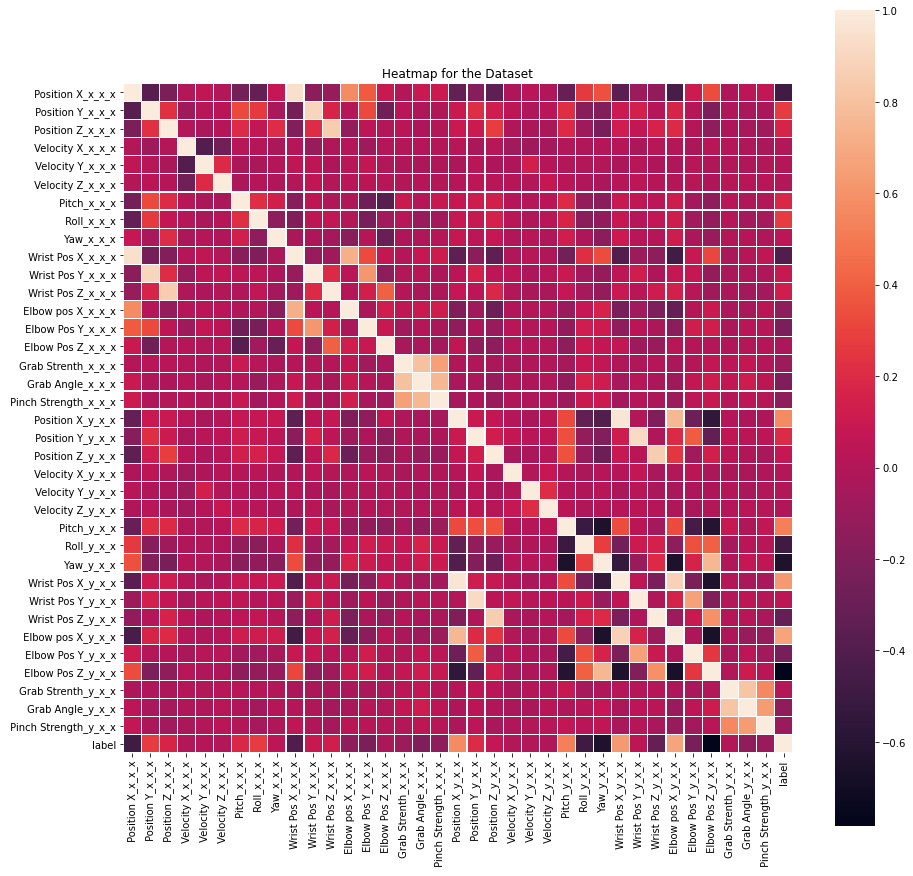

In [335]:
plt.subplots(figsize=(15, 15))
sns.heatmap(train_df.corr(), linewidths=0.2 , square=True)
plt.title('Heatmap for the Dataset')
plt.show()

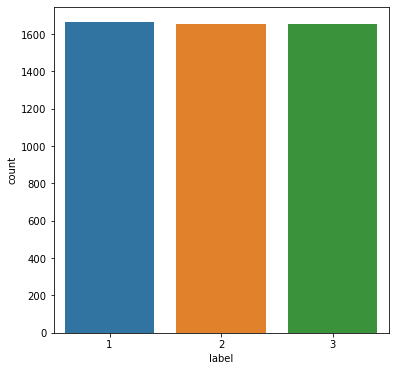

In [336]:
plt.figure(figsize = (6,6))
sns.countplot(x = "label", data = train_df)

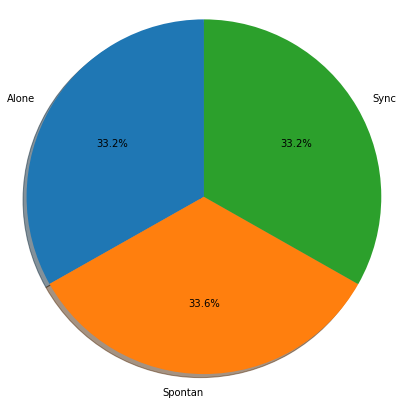

In [340]:
labels = 'Alone','Spontan','Sync'
sizes = [31363, 31771, 31379]

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

### split the Data

In [169]:
X_train = train_df.drop(['label'], axis= 1)
y_train = train_df['label']
X_test = test_df.drop(['label'], axis= 1)
y_test = test_df['label']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4976, 36)
(4976,)
(888, 36)
(888,)


#### Standarnt Scale

In [171]:
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(X_test), columns= X_test.columns)

#### PCA

during the semester we learned about the importance of dimensionality reduction

I'll try to use PCA in order of to reduce dimensions from the Model

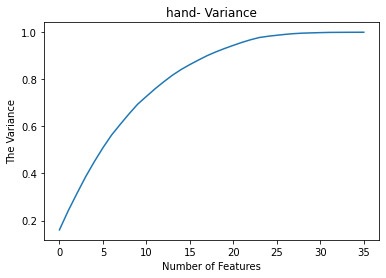

In [183]:
pca = PCA().fit(x_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Features")
plt.ylabel("The Variance")
plt.title("hand- Variance")
plt.show()

It's look like number between 20-25 near to the pick of the graph. 

I'll take number of components to be 23

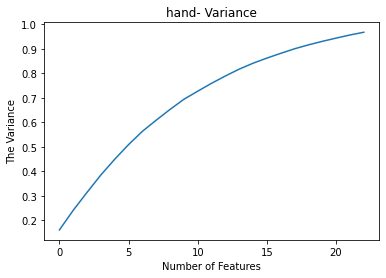

In [184]:
pca = PCA(n_components=23).fit(x_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Features")
plt.ylabel("The Variance")
plt.title("hand- Variance")
plt.show()

In [186]:
x_train_end = pca.fit_transform(x_train)
x_test_end = pca.transform(x_test)

print(x_train_end.shape)
print(x_test_end.shape)

(4976, 23)
(888, 23)


## Modeling

### KNN

The Accuracy score for 4 nearest neighbers is: 84.6%


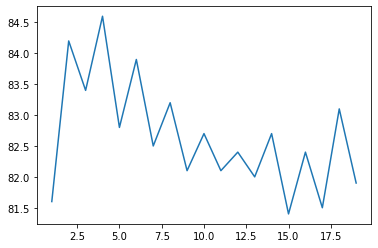

In [189]:
accuracy = []
for i in range (1,20):
    model_knn_ = KNeighborsClassifier(n_neighbors = i)
    model_knn_fit_ = model_knn_.fit(x_train_end, y_train)
    model_knn_pred_ = model_knn_.predict(x_test_end)
    acc_knn = accuracy_score(y_test, model_knn_pred_)
    accuracy.append(round(acc_knn,3)*100)
index = accuracy.index(max(accuracy))+1

print("The Accuracy score for " + str(index) +" nearest neighbers is: " + str(max(accuracy)) +"%")
plt.plot(range(1,20),accuracy)
plt.show()

In [190]:
model_knn = KNeighborsClassifier(n_neighbors= 4)
model_knn_fit = model_knn.fit(x_train_end,y_train)
model_knn_pred = model_knn.predict(x_test_end)

acc_knn = accuracy_score(y_test,model_knn_pred)
print("The Accuracy score for KNN Model is: " + str(round(acc_knn,3)*100) +"%")
print(classification_report(y_test, model_knn_pred))

The Accuracy score for KNN Model is: 84.6%
              precision    recall  f1-score   support

           1       1.00      0.93      0.97       436
           2       0.72      0.72      0.72       226
           3       0.71      0.80      0.75       226

    accuracy                           0.85       888
   macro avg       0.81      0.82      0.81       888
weighted avg       0.86      0.85      0.85       888



### Logistic Regression

In [191]:
model_lr = LogisticRegression()
model_lr_fit = model_lr.fit(x_train_end,y_train)
model_lr_pred = model_lr.predict(x_test_end)

acc_lr = accuracy_score(y_test,model_lr_pred)
print("The Accuracy score for Logistic Regression Model is: " + str(round(acc_lr,3)*100) +"%")
print(classification_report(y_test, model_lr_pred))

The Accuracy score for Logistic Regression Model is: 79.2%
              precision    recall  f1-score   support

           1       1.00      0.91      0.95       436
           2       0.65      0.62      0.64       226
           3       0.60      0.73      0.66       226

    accuracy                           0.79       888
   macro avg       0.75      0.75      0.75       888
weighted avg       0.81      0.79      0.80       888



### XGBoost

In [252]:
mmodel_xgb = XGBClassifier(n_estimators= 400,eval_metric= 'logloss')
model_xgb_fit = model_xgb.fit(x_train_end,y_train)
model_xgb_pred = model_xgb.predict(x_test_end)

acc_xgb = accuracy_score(y_test,model_xgb_pred)
print("The Accuracy score for XGBoost Model is: " + str(round(acc_xgb,3)*100) +"%")
print(classification_report(y_test, model_xgb_pred))

The Accuracy score for XGBoost Model is: 82.8%
              precision    recall  f1-score   support

           1       1.00      0.93      0.96       436
           2       0.74      0.63      0.68       226
           3       0.65      0.82      0.72       226

    accuracy                           0.83       888
   macro avg       0.79      0.79      0.79       888
weighted avg       0.84      0.83      0.83       888



### AdaBoost

In [254]:
model_ada = AdaBoostClassifier(n_estimators= 1000)
model_ada_fit_ = model_ada.fit(x_train_end,y_train)
model_ada_pred_ = model_ada.predict(x_test_end)

acc_ada_ = accuracy_score(y_test,model_ada_pred_)
print("The Accuracy score for AdaBoost Model is: " + str(round(acc_ada_,3)*100) +"%")
print(classification_report(y_test, model_ada_pred_))

The Accuracy score for AdaBoost Model is: 74.5%
              precision    recall  f1-score   support

           1       1.00      0.85      0.92       436
           2       0.59      0.87      0.70       226
           3       0.52      0.42      0.47       226

    accuracy                           0.75       888
   macro avg       0.70      0.71      0.70       888
weighted avg       0.77      0.75      0.75       888



In [263]:
estimators = [('KNN', model_knn),('LR', model_lr),('XGB',model_xgb)]

### voting

In [262]:
model_vote = VotingClassifier(estimators= estimators)
model_vote_fit = model_vote.fit(x_train_end,y_train)
model_vote_pred = model_vote.predict(x_test_end)

acc_vote = accuracy_score(y_test,model_vote_pred)
print("The Accuracy score for Voting Model is: " + str(round(acc_vote,3)*100) +"%")
print(classification_report(y_test, model_vote_pred))

The Accuracy score for Voting Model is: 82.39999999999999%
              precision    recall  f1-score   support

           1       1.00      0.93      0.96       436
           2       0.71      0.65      0.68       226
           3       0.65      0.80      0.72       226

    accuracy                           0.82       888
   macro avg       0.79      0.79      0.79       888
weighted avg       0.84      0.82      0.83       888



In [199]:
model_vote = VotingClassifier(estimators= estimators, voting= 'soft')
model_vote_fit = model_vote.fit(x_train_end,y_train)
model_vote_pred = model_vote.predict(x_test_end)

acc_vote = accuracy_score(y_test,model_vote_pred)
print("The Accuracy score for Voting Model is: " + str(round(acc_vote,3)*100) +"%")
print(classification_report(y_test, model_vote_pred))

The Accuracy score for Voting Model is: 84.3%
              precision    recall  f1-score   support

           1       1.00      0.95      0.98       436
           2       0.76      0.64      0.69       226
           3       0.67      0.84      0.75       226

    accuracy                           0.84       888
   macro avg       0.81      0.81      0.80       888
weighted avg       0.85      0.84      0.84       888



### Stacking

In [201]:
model_stck = StackingClassifier(estimators= estimators)
model_stck_fit = model_stck.fit(x_train_end,y_train)
model_stck_pred = model_stck.predict(x_test_end)



acc_stck = accuracy_score(y_test,model_stck_pred)
print(classification_report(y_test, model_stck_pred))
print("The Accuracy score for Stacking Model is: " + str(round(acc_stck,3)*100) +"%")

              precision    recall  f1-score   support

           1       1.00      0.95      0.97       436
           2       0.74      0.62      0.67       226
           3       0.67      0.84      0.75       226

    accuracy                           0.84       888
   macro avg       0.80      0.80      0.80       888
weighted avg       0.85      0.84      0.84       888

The Accuracy score for Stacking Model is: 83.7%


### Bagging

In [202]:
bagging = BaggingClassifier(base_estimator= model_xgb)
bagging_fit = bagging.fit(x_train_end,y_train)
bagging_pred = bagging.predict(x_test_end)

acc_bagging = accuracy_score(y_test,bagging_pred)

print(classification_report(y_test, bagging_pred))
print("The Accuracy score for Bagging Model is: " + str(round(acc_bagging,3)*100) +"%")

              precision    recall  f1-score   support

           1       1.00      0.93      0.96       436
           2       0.72      0.64      0.68       226
           3       0.65      0.81      0.72       226

    accuracy                           0.82       888
   macro avg       0.79      0.79      0.79       888
weighted avg       0.84      0.82      0.83       888

The Accuracy score for Bagging Model is: 82.3%


In [203]:
bagging = BaggingClassifier(base_estimator= model_knn)
bagging_fit = bagging.fit(x_train_end,y_train)
bagging_pred = bagging.predict(x_test_end)

acc_bagging = accuracy_score(y_test,bagging_pred)

print(classification_report(y_test, bagging_pred))
print("The Accuracy score for Bagging Model is: " + str(round(acc_bagging,3)*100) +"%")

              precision    recall  f1-score   support

           1       1.00      0.92      0.96       436
           2       0.73      0.66      0.69       226
           3       0.69      0.85      0.76       226

    accuracy                           0.84       888
   macro avg       0.80      0.81      0.80       888
weighted avg       0.85      0.84      0.84       888

The Accuracy score for Bagging Model is: 83.8%


### Gradient Boosting

In [204]:
grad = GradientBoostingClassifier()
grad_fit = grad.fit(x_train_end,y_train)
grad_pred = grad.predict(x_test_end)

acc_grad = accuracy_score(y_test,grad_pred)

print(classification_report(y_test, grad_pred))
print("The Accuracy score for GradientBoosting Model is: " + str(round(acc_grad,3)*100) +"%")

              precision    recall  f1-score   support

           1       0.99      0.89      0.94       436
           2       0.70      0.68      0.69       226
           3       0.64      0.79      0.71       226

    accuracy                           0.81       888
   macro avg       0.78      0.79      0.78       888
weighted avg       0.83      0.81      0.82       888

The Accuracy score for GradientBoosting Model is: 81.10000000000001%


In [342]:
end = {'KNN':['84.6 %'],
       'Logistick Regression':['79.2 %'],
       'XGBoost':['82.8 %'],
       'AdaBoost':['74.5 %'],
       'Voting':['84.3 %'],
       'Stacking':['83.7 %'],
       'Bagging':['83.8 %'],
       'GradientBoosting':['81.1 %']}

dataF = pd.DataFrame(data= end, 
                     columns= ['KNN','Logistick Regression', 'XGBoost','AdaBoost','Voting','Stacking','Bagging','GradientBoosting'],
                     index= ['Accuracy'])
dataF

,KNN,Logistick Regression,XGBoost,AdaBoost,Voting,Stacking,Bagging,GradientBoosting
Accuracy,84.6 %,79.2 %,82.8 %,74.5 %,84.3 %,83.7 %,83.8 %,81.1 %


## as we can see KNN id the best Model and the result is 84.6% with 23 fitures!

#### Until now just trainning

### I have another 3 people for validation so I'll test them now

In [266]:
#itiel
it_alone = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Validation\Itiel Lab\Itiel636770942529041679Alone.csv')
it_spon= pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Validation\Itiel Lab\Itiel636770940701219076Spontan.csv')
it_syn = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Validation\Itiel Lab\Itiel636770941638547912Sync.csv')                       

#mor
mor_alone = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Validation\Mor SHerman\Mor636771066407626524Alone.csv')
mor_spon = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Validation\Mor SHerman\Mor636771064635567065Spontan.csv')
mor_syn = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Validation\Mor SHerman\Mor636771065531910215Sync.csv')

#oded
od_alone = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Validation\Oded Medina\Oded636754669540564461Alone.csv')
od_spon = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Validation\Oded Medina\Oded636754670490266956Spontan.csv')
od_syn = pd.read_csv(r'C:\Users\tavor\Downloads\קבצים לעבודת גמר\extraFiles\Validation\Oded Medina\Oded636754671560850581Sync.csv')

In [270]:
alone_t = [it_alone, mor_alone, od_alone]
alone_te = pd.concat(alone_t)
alone_te = alone_te[alone_te[' # hands'] == 1]
alone_te.insert(2, "ind", range(10934),True)
alone_te

,Time,Frame ID,ind,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,955.0626,111367,0,left,1,-103.18630,202.8448,69.55882,33.932390,-21.290810,...,1.325872,-152.2580,157.3769,76.07510,-354.5008,33.95922,105.8119,0.000000,0.691257,0.169335
1,955.0790,111369,1,left,1,-102.32960,202.9333,69.08538,57.518310,8.059143,...,1.315364,-151.0200,157.0506,75.89672,-350.3571,28.37328,102.8271,0.000000,0.942137,0.029751
2,955.0956,111370,2,left,1,-101.89290,203.3188,68.85271,51.158620,45.151250,...,1.308074,-150.0901,156.9368,75.83788,-348.1030,26.00696,101.6572,0.072042,1.107757,0.000000
3,955.1122,111372,3,left,1,-101.29390,204.3285,68.23683,14.659080,46.431220,...,1.289553,-148.4725,156.9996,75.79698,-344.0828,22.67866,102.4965,0.196061,1.322298,0.000000
4,955.1291,111374,4,left,1,-101.26050,204.2364,67.71336,2.770436,-32.604220,...,1.276453,-149.0222,157.6454,76.03125,-347.5767,28.41657,105.9374,0.159523,1.533984,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,796.7517,50329,10929,left,1,-62.14733,282.7198,62.15659,-90.006310,-129.346800,...,0.853153,-107.4325,230.6662,88.71685,-297.5073,60.94059,148.1517,0.000000,0.149477,0.000000
2246,796.7842,50331,10930,left,1,-64.38816,276.7341,60.39418,-51.703520,-204.264300,...,0.791928,-108.3709,224.7578,89.17332,-293.6125,50.64548,151.1262,0.000000,0.205101,0.000000
2247,796.8187,50333,10931,left,1,-65.33954,272.7191,59.17199,-27.796780,-111.888100,...,0.758811,-108.3173,220.3898,88.81828,-290.7480,44.09612,152.9062,0.000000,0.304604,0.000000
2248,796.8510,50336,10932,left,1,-67.02361,268.6757,57.91473,-31.616060,-76.331120,...,0.730031,-108.7151,215.5677,88.03761,-285.7091,36.18958,158.4956,0.000000,0.374116,0.000000


In [297]:
alone_tes = pd.merge(alone_te, right, how= 'outer', on= ['ind'])
alone_tes = alone_tes.iloc[:10934]

In [274]:
spon_t = [it_spon,mor_spon,od_spon]
spon_te = pd.concat(spon_t)
spon_te = spon_te[spon_te[' # hands'] == 2]
spon_tes = pd.merge(spon_te[spon_te[' Hand Type'] == 'left'], spon_te[spon_te[' Hand Type'] == 'right'], how= 'outer', on= [' Frame ID','Time'])
spon_tes

,Time,Frame ID,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,772.2799,90321,left,2,-218.3570,305.6544,63.57877,193.24920,313.48280,-16.518940,...,-1.555058,129.0877,196.6624,107.62950,351.3936,90.846980,131.1359,0.0,0.453898,0.0
1,772.2964,90323,left,2,-213.4492,312.6948,62.97603,378.39140,334.78480,-62.017350,...,-1.579605,127.3381,193.0091,111.56650,354.6543,98.620460,135.8045,0.0,0.495044,0.0
2,772.3131,90325,left,2,-205.4089,316.8528,62.02932,653.07540,110.54620,-125.049700,...,-1.597150,125.6021,190.9333,115.36450,356.3591,105.175300,139.1584,0.0,0.518979,0.0
3,772.3296,90327,left,2,-198.0762,315.0475,59.80693,399.98640,-148.97200,-128.156700,...,-1.609908,124.1724,188.8540,118.54230,355.9033,104.770300,138.5432,0.0,0.533946,0.0
4,772.3464,90328,left,2,-195.1706,313.2556,58.88690,336.18630,-207.33030,-106.447900,...,-1.612697,123.4233,187.3725,119.44890,355.2591,103.042800,137.0559,0.0,0.575149,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,891.7161,58577,left,2,-119.0939,266.9509,90.19492,20.51686,-54.38897,-79.527550,...,1.829542,259.1438,214.1489,81.66591,357.1292,-23.849340,117.5243,0.0,0.000000,0.0
11149,891.7498,58580,left,2,-119.6823,265.0744,88.75297,-31.67868,-38.33282,-30.122560,...,1.967254,263.3937,219.1755,90.31033,364.5702,-18.458120,118.9476,0.0,0.039183,0.0
11150,891.7819,58583,left,2,-120.5057,263.0826,88.22878,-21.62192,-62.06139,-9.631733,...,2.183346,270.1656,225.3236,100.75550,377.3418,-11.117420,112.1917,0.0,0.070024,0.0
11151,891.8161,58585,left,2,-121.2682,261.9093,88.43225,-38.91143,-56.67702,15.780990,...,2.434011,272.7868,227.7773,106.85620,384.1153,-6.891727,114.2839,0.0,0.104950,0.0


In [275]:
syn_t = [it_syn,mor_syn,od_syn]
syn_te = pd.concat(syn_t)
syn_te = syn_te[syn_te[' # hands'] == 2]
syn_tes = pd.merge(syn_te[syn_te[' Hand Type'] == 'left'], syn_te[syn_te[' Hand Type'] == 'right'], how= 'outer', on= [' Frame ID','Time'])
syn_tes

,Time,Frame ID,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,865.9976,101109,left,2,-169.46250,228.3028,107.17290,9.920160,1.107885,140.91000,...,-1.855098,122.0846,170.6122,100.16960,276.2068,-9.721443,135.5313,0.0,0.000000,0.0
1,866.0141,101111,left,2,-169.33500,228.0368,109.20630,4.446306,-32.682920,114.00140,...,-1.742294,120.4262,172.9143,100.24080,280.8544,-1.658156,136.4561,0.0,0.000000,0.0
2,866.0306,101112,left,2,-169.05510,227.6669,109.89220,32.247900,-42.621700,79.02841,...,-1.695856,119.1007,173.9150,99.89700,281.7841,1.465358,136.2225,0.0,0.000000,0.0
3,866.0480,101114,left,2,-167.91790,226.6983,110.49990,63.069720,-46.391580,23.85685,...,-1.612333,116.5025,176.2925,98.74449,282.0415,6.572340,135.0247,0.0,0.000000,0.0
4,866.0641,101116,left,2,-166.95720,225.7605,110.46400,55.636890,-61.350080,-13.61763,...,-1.540096,114.4836,179.7164,98.17319,279.3752,9.066888,133.0133,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,998.7513,66216,left,2,-98.32814,314.4973,75.12682,41.168180,115.850700,27.61459,...,-1.447439,156.7337,255.0919,101.90250,341.0338,65.011460,125.5006,0.0,0.000000,0.0
11012,998.7836,66219,left,2,-97.31071,319.5955,76.22157,31.363020,143.961000,30.50205,...,-1.447845,157.5847,259.1192,102.11500,336.8353,64.012150,123.4790,0.0,0.000000,0.0
11013,998.8158,66221,left,2,-96.74767,323.8981,76.98316,27.149880,185.621800,33.74187,...,-1.436827,159.1932,263.2726,102.53110,332.9102,62.993430,121.6264,0.0,0.000000,0.0
11014,998.8495,66224,left,2,-95.67720,329.8123,78.13316,47.376960,118.316700,24.15247,...,-1.418975,163.0329,269.7217,103.07490,340.7914,72.963470,121.5707,0.0,0.024162,0.0


In [298]:
alone_tss = split_row_every_5(alone_tes)
spon_tss = split_row_every_5(spon_tes)
sync_tss = split_row_every_5(syn_tes)
print(alone_tss.shape)
print(spon_tss.shape)
print(sync_tss.shape)

(2187, 45)
(2231, 42)
(2204, 42)


In [300]:
spon_tss.insert(2, "ind", range(2231),True)
sync_tss.insert(2, "ind", range(2204),True)

In [301]:
alone_tss_ = join_row_every_4(alone_tss)
spon_tss_ = join_row_every_4(spon_tss)
sync_tss_ = join_row_every_4(sync_tss)
print(alone_tss_.shape)
print(spon_tss_.shape)
print(sync_tss_.shape)

(547, 177)
(558, 169)
(551, 169)


In [303]:
alone_tss_['label'] = 1
spon_tss_['label'] = 2
sync_tss_['label'] = 3

In [306]:
tes = [alone_tss_, spon_tss_,sync_tss_]
tes_df = pd.concat(tes)
tes_df_ = tes_df.dropna(axis='columns')
tes_df_

,ind,Hand Type_x_x_x,# hands_x_x_x,Position X_x_x_x,Position Y_x_x_x,Position Z_x_x_x,Velocity X_x_x_x,Velocity Y_x_x_x,Velocity Z_x_x_x,Pitch_x_x_x,...,Wrist Pos X_y_x_x,Wrist Pos Y_y_x_x,Wrist Pos Z_y_x_x,Elbow pos X_y_x_x,Elbow Pos Y_y_x_x,Elbow Pos Z_y_x_x,Grab Strenth_y_x_x,Grab Angle_y_x_x,Pinch Strength_y_x_x,label
0,0,left,1.0,-103.18630,202.8448,69.55882,33.93239,-21.29081,-29.80458,1.275502,...,46.88831,207.3548,86.235890,203.8337,49.335070,237.45530,0.0,0.206389,0.000000,1
1,10,left,1.0,-94.55505,204.1006,69.65396,61.13272,102.52060,88.18256,1.085372,...,50.22053,202.4105,82.178560,198.7624,32.086820,228.42370,0.0,0.466381,0.000000,1
2,20,left,1.0,-97.43760,235.5954,68.44859,-124.51030,24.25679,-178.28940,1.533079,...,50.77441,206.9303,84.813610,206.5852,50.059390,238.36160,0.0,0.669196,0.119215,1
3,30,left,1.0,-131.10090,256.4490,51.21101,-187.12710,739.80900,-36.06662,1.203509,...,49.87231,201.9112,88.988690,211.1888,38.752330,229.75720,0.0,0.134935,0.000000,1
4,40,left,1.0,-102.78000,295.2413,55.84531,179.66280,68.62138,128.76580,1.424335,...,47.18960,219.2856,86.159940,216.0508,71.159290,234.64150,0.0,0.113478,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,1092,left,2.0,-61.58147,155.5625,-70.63882,30.21082,201.92270,-163.47410,0.720205,...,144.78120,174.4062,5.913712,274.7950,-6.080276,112.34600,0.0,0.000000,0.000000,3
547,1094,left,2.0,-62.85942,213.2262,-82.91354,-104.72820,404.64360,35.29619,0.969069,...,136.15490,204.3681,-8.915851,288.1227,45.419570,102.65440,0.0,0.065170,0.000000,3
548,1096,left,2.0,-67.98474,275.7909,-80.65756,-81.15646,292.16790,63.66419,1.134447,...,145.97040,212.5269,1.319282,288.8078,34.533080,94.71336,0.0,0.599232,0.000000,3
549,1098,left,2.0,-72.46326,281.2913,-73.70818,-39.09248,-179.58560,28.95628,1.019256,...,182.68590,227.2973,54.424150,354.9008,67.401520,129.13780,0.0,1.195410,0.000000,3


In [307]:
df_test = tes_df_.drop(columns= ['ind',
                        ' Hand Type_x_x_x',
                        ' # hands_x_x_x',
                        ' Hand Type_y_x_x',
                        ' # hands_y_x_x'] )

In [308]:
val = df_test.sample(frac=1).reset_index(drop=True)
val

,Position X_x_x_x,Position Y_x_x_x,Position Z_x_x_x,Velocity X_x_x_x,Velocity Y_x_x_x,Velocity Z_x_x_x,Pitch_x_x_x,Roll_x_x_x,Yaw_x_x_x,Wrist Pos X_x_x_x,...,Wrist Pos X_y_x_x,Wrist Pos Y_y_x_x,Wrist Pos Z_y_x_x,Elbow pos X_y_x_x,Elbow Pos Y_y_x_x,Elbow Pos Z_y_x_x,Grab Strenth_y_x_x,Grab Angle_y_x_x,Pinch Strength_y_x_x,label
0,-190.92660,226.9241,54.510130,86.55643,14.26901,35.316680,1.857808,0.032850,1.907620,-230.25170,...,171.674900,187.2580,110.80750,336.0261,17.661660,155.16660,0.000000,0.008522,0.000000,3
1,-102.26310,294.4602,65.405000,219.65260,-13.91034,41.960850,1.094676,0.810349,1.166109,-154.14480,...,18.043310,149.2499,116.65670,154.3891,67.143460,340.60240,0.000000,0.757117,0.000000,1
2,-159.23040,224.3425,143.860000,-47.22992,118.58290,78.418320,2.488446,-0.338410,-2.754293,-140.29880,...,248.832000,225.9041,84.77682,365.2098,29.837580,159.40690,0.127975,0.928394,0.000000,2
3,-76.18334,178.1035,0.966286,-89.48933,60.97882,72.424920,1.023227,1.612177,0.948614,-117.25950,...,37.918920,140.7535,135.23840,200.8028,53.603690,332.31130,0.000000,0.000000,0.000000,1
4,29.83853,300.2567,101.422200,-196.14290,-161.09370,-130.351500,1.575057,0.668883,1.574175,-24.34392,...,4.661488,168.6664,114.54840,101.9878,27.376910,329.65650,0.000000,0.101900,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,-156.16230,236.1631,53.630480,20.31830,32.29745,0.596608,1.510470,0.381615,1.545810,-220.23670,...,156.459800,123.3416,35.48170,249.9133,-28.162870,212.95750,0.000000,0.005313,0.000000,2
1652,144.09720,192.6004,94.185280,107.87400,254.61680,23.466650,-0.011038,3.043829,0.830879,96.84159,...,57.112470,258.9286,119.51320,171.6185,108.761200,319.08340,0.000000,0.195665,0.000000,1
1653,-64.64542,197.5091,57.362550,103.76960,-160.31090,65.088100,1.691781,1.581325,-2.493397,-64.11369,...,171.877600,142.8137,41.66549,350.1436,-24.533430,68.35645,0.000000,0.000000,0.000000,3
1654,-157.06090,206.8945,38.991230,-51.59570,-94.43306,-91.905520,0.800510,1.890973,0.685411,-190.83390,...,130.730600,195.5696,30.61820,270.7288,23.428370,118.85800,0.000000,0.065478,0.000000,3


In [310]:
a_test = val.drop(['label'], axis=1)
b_test = val['label']

In [311]:
a_test = pd.DataFrame(scaler.fit_transform(a_test), columns= a_test.columns)

In [314]:
a_test_end = pca.transform(a_test)

print(x_train_end.shape)
print(a_test_end.shape)

(4976, 23)
(1656, 23)


## Modeling for validation

### KNN

The Accuracy score for 16 nearest neighbers is: 89.3%


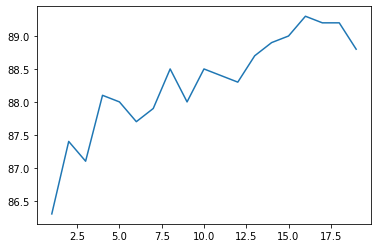

In [315]:
accuracy = []
for i in range (1,20):
    model_knn_ = KNeighborsClassifier(n_neighbors = i)
    model_knn_fit_ = model_knn_.fit(x_train_end, y_train)
    model_knn_pred_ = model_knn_.predict(a_test_end)
    acc_knn = accuracy_score(b_test, model_knn_pred_)
    accuracy.append(round(acc_knn,3)*100)
index = accuracy.index(max(accuracy))+1

print("The Accuracy score for " + str(index) +" nearest neighbers is: " + str(max(accuracy)) +"%")
plt.plot(range(1,20),accuracy)
plt.show()

In [316]:
model_knn = KNeighborsClassifier(n_neighbors= 16)
model_knn_fit = model_knn.fit(x_train_end,y_train)
model_knn_pred = model_knn.predict(a_test_end)

acc_knn = accuracy_score(b_test,model_knn_pred)
print("The Accuracy score for KNN Model is: " + str(round(acc_knn,3)*100) +"%")
print(classification_report(b_test, model_knn_pred))

The Accuracy score for KNN Model is: 89.3%
              precision    recall  f1-score   support

           1       1.00      0.97      0.98       547
           2       0.82      0.89      0.86       558
           3       0.87      0.82      0.84       551

    accuracy                           0.89      1656
   macro avg       0.90      0.89      0.89      1656
weighted avg       0.90      0.89      0.89      1656



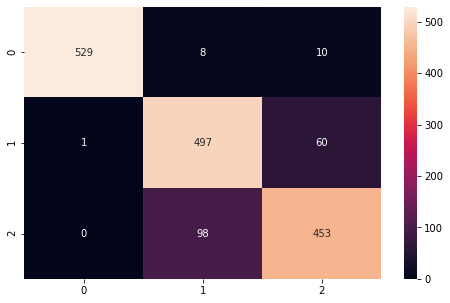

In [341]:
confmat_knn = confusion_matrix(b_test, model_knn_pred)
conf_matrix_knn = pd.DataFrame(data=confmat_knn)
plt.figure(figsize = (8,5))
sns.heatmap(pd.DataFrame(conf_matrix_knn), annot = True, fmt = "g")

## The result: Model KNN with 16 neighbers predict 89.3% with 23 fituers!!!

## The best Model for this data is the KNN model

### The F1 score result:
#### alone 98 %
#### spontan 86%
#### sync 84%
